In [15]:
#imports
import cv2 as cv
import numpy as np
from skimage.metrics import structural_similarity as ssim
import glob
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

In [16]:
#function to display multiple images in subplots
def display_images(list_of_images,list_of_titles=None):
    N=len(list_of_images)
    M=int(np.ceil(N/2))
    figs,ax=plt.subplots(M,2,figsize=(12,12))
    ax=ax.flatten()
    for i in range(len(list_of_images)):
        ax[i].imshow(list_of_images[i],cmap='gray')
        if list_of_titles is not None:
            ax[i].title.set_text(list_of_titles[i])

    plt.show()

In [17]:
#function to scale image to [0,1] range
def scale_image(image):
    return (image-np.min(image))/(np.max(image)-np.min(image))

In [18]:
def pca_denoising(noisy_image,original_image):
    best_ssim=0
    best_denoised_image=None
    for n_components in range(50,220,5):
        pca=PCA(int(n_components))
        img_transformed=pca.fit_transform(noisy_image)
        img_inverted=pca.inverse_transform(img_transformed)
        ssim_val=ssim(img_inverted,original_image)
        if best_denoised_image is None:
            best_denoised_image=img_inverted.copy()
            best_ssim=ssim_val
        else:
            if ssim_val>best_ssim:
                best_ssim=ssim_val
                best_denoised_image=img_inverted.copy()
    return [best_denoised_image,best_ssim,n_components]

        

In [19]:
args={}
args["original"]="../../dataset/CBSD68-dataset/CBSD68/original_png"
args["noisy"]="../../dataset/CBSD68-dataset/CBSD68/noisy25"
args["variance"]=25

In [20]:
original_images_list=glob.glob(args["original"]+"/*")
noisy_images_list=glob.glob(args["noisy"]+"/*")


In [21]:
n_components_list=[]
for i in range(len(original_images_list)):
    noisy_image_path=noisy_images_list[i]
    image_name=noisy_image_path.split("/")[-1]
    original_image_path=args["original"]+"/"+image_name
    original_image=cv.imread(original_image_path)
    original_image=cv.cvtColor(original_image,cv.COLOR_BGR2GRAY)
    original_image=scale_image(original_image)
    noisy_image=cv.imread(noisy_image_path)
    noisy_image=cv.cvtColor(noisy_image,cv.COLOR_BGR2GRAY)
    noisy_image=scale_image(noisy_image)
    best_denoised_image,best_ssim,n_components=pca_denoising(noisy_image,original_image)
    best_denoised_image=np.uint8(255*best_denoised_image)
    n_components_list.append(n_components)
    output_name="output_{}/{}".format(args["variance"],image_name)
    cv.imwrite(output_name,best_denoised_image)
    print("[INFO] Processed {} / {} ".format(i+1,len(original_images_list)))

[INFO] Processed 1 / 68 
[INFO] Processed 2 / 68 
[INFO] Processed 3 / 68 
[INFO] Processed 4 / 68 
[INFO] Processed 5 / 68 
[INFO] Processed 6 / 68 
[INFO] Processed 7 / 68 
[INFO] Processed 8 / 68 
[INFO] Processed 9 / 68 
[INFO] Processed 10 / 68 
[INFO] Processed 11 / 68 
[INFO] Processed 12 / 68 
[INFO] Processed 13 / 68 
[INFO] Processed 14 / 68 
[INFO] Processed 15 / 68 
[INFO] Processed 16 / 68 
[INFO] Processed 17 / 68 
[INFO] Processed 18 / 68 
[INFO] Processed 19 / 68 
[INFO] Processed 20 / 68 
[INFO] Processed 21 / 68 
[INFO] Processed 22 / 68 
[INFO] Processed 23 / 68 
[INFO] Processed 24 / 68 
[INFO] Processed 25 / 68 
[INFO] Processed 26 / 68 
[INFO] Processed 27 / 68 
[INFO] Processed 28 / 68 
[INFO] Processed 29 / 68 
[INFO] Processed 30 / 68 
[INFO] Processed 31 / 68 
[INFO] Processed 32 / 68 
[INFO] Processed 33 / 68 
[INFO] Processed 34 / 68 
[INFO] Processed 35 / 68 
[INFO] Processed 36 / 68 
[INFO] Processed 37 / 68 
[INFO] Processed 38 / 68 
[INFO] Processed 39 /

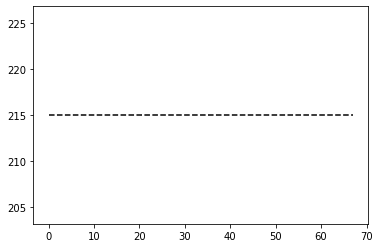

In [24]:
plt.plot(n_components_list,'k--')

In [23]:
!ls

Untitled.ipynb output_15      output_25
